In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("Daten/Kreditausfaelle/default.csv", delimiter=";")
target = "default.payment.next.month"

# First Look

__LIMIT_BAL__: Gewährter Kreditrahmen  
__SEX__: Geschlecht (1 = männlich, 2 = weiblich)  
__EDUCATION__: (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown)  
__MARRIAGE__: Familienstand (1 = verheiratet, 2 = ledig, 3 = sonstiges)  
__AGE__: Alter in Jahren  
__default.payment.next.month__: Zahlungsausfall im Folgemonat (1 = Zahlungsausfall, 0 = kein Zahlungsausfall)  

In [47]:
ausfall = 1
zahlung = 0

In [48]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
0,200000.0,1.0,2.0,2.0,25.0,0
1,20000.0,NaN,1.0,2.0,25.0,0
2,60000.0,2.0,2.0,1.0,44.0,0
3,95000.0,1.0,2.0,2.0,41.0,0
4,95000.0,2.0,2.0,2.0,31.0,0


In [49]:
len(df)

59999

In [50]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
count,58827.000000,58762.000000,58786.000000,58796.000000,58781.000000,59999.000000
mean,172988.520237,1.610326,1.969959,1.555582,35.550348,0.019884
std,112822.340419,0.487680,0.726642,0.521326,7.937031,0.139602
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,80000.000000,1.000000,2.000000,1.000000,29.000000,0.000000
50%,155000.000000,2.000000,2.000000,2.000000,35.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,40.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000


# None Values

In [51]:
nones = df[df.isna().any(axis=1)]
nones.head() 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
1,20000.0,NaN,1.0,2.0,25.0,0
15,NaN,1.0,3.0,2.0,38.0,0
24,250000.0,2.0,NaN,1.0,29.0,0
26,NaN,2.0,2.0,2.0,31.0,0
43,220000.0,2.0,NaN,1.0,45.0,0


In [52]:
len(nones)

5809

In [53]:
df.isna().sum()

LIMIT_BAL                     1172
SEX                           1237
EDUCATION                     1213
MARRIAGE                      1203
AGE                           1218
default.payment.next.month       0
dtype: int64

In [59]:
df[df[target] == ausfall].isna().sum()

LIMIT_BAL                     25
SEX                           20
EDUCATION                     26
MARRIAGE                      28
AGE                           23
default.payment.next.month     0
dtype: int64

In [74]:
len(nones[nones[target] == ausfall])

114

# Einzelwerte

## LIMIT_BAL
LIMIT_BAL: Gewährter Kreditrahmen

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

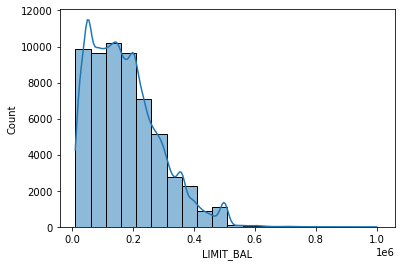

In [84]:
sns.histplot(
    data=df, 
    x="LIMIT_BAL",
    binwidth=50000,
    kde=True
) 

<AxesSubplot:>

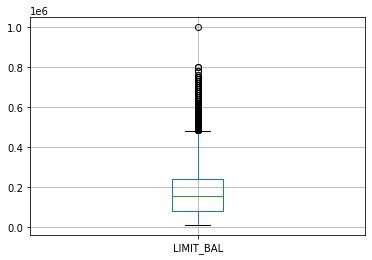

In [85]:
df.boxplot(
    column="LIMIT_BAL"
)

In [96]:
limits = df["LIMIT_BAL"].unique()
np.nanmin(limits), np.nanmax(limits), len(limits)

(10000.0, 1000000.0, 147)

1000000.0

__Type__: Numerisch  
__Auffälligkeiten__:  
- Höchste Dichte bis 200.000
- Ab 500.000 kann als Outliner angesehen werden
- 147 verschiedene Kreditrahmen
- von 10.000 bis 1.000.000

## SEX
SEX: Geschlecht (1 = männlich, 2 = weiblich)

<AxesSubplot:xlabel='SEX', ylabel='Count'>

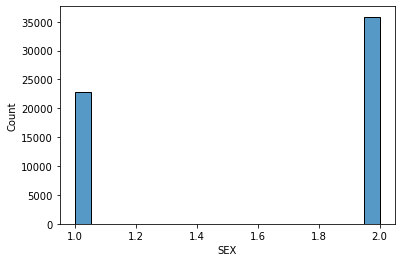

In [11]:
sns.histplot(
    data=df, 
    x="SEX",
) 

In [12]:
df["SEX"].value_counts()

2.0    35864
1.0    22898
Name: SEX, dtype: int64

In [13]:
df[df["SEX"].isna() == True]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
1,20000.0,NaN,1.0,2.0,25.0,0
185,140000.0,NaN,1.0,1.0,34.0,0
193,330000.0,NaN,2.0,1.0,42.0,0
272,165000.0,NaN,2.0,1.0,32.0,0
281,25000.0,NaN,3.0,1.0,36.0,0
...,...,...,...,...,...,...
59783,215000.0,NaN,3.0,1.0,45.0,0
59837,150000.0,NaN,NaN,2.0,24.0,0
59845,180000.0,NaN,1.0,2.0,27.0,0
59874,240000.0,NaN,1.0,2.0,28.0,0


## EDUCATION
EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown)

<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

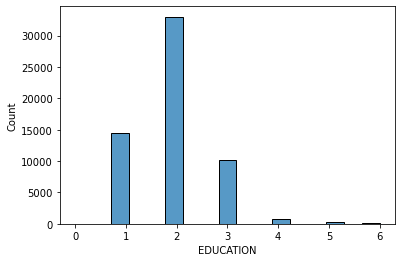

In [14]:
sns.histplot(
    data=df, 
    x="EDUCATION",
) 

In [15]:
df["EDUCATION"].value_counts().sort_index()

0.0       13
1.0    14481
2.0    33001
3.0    10246
4.0      694
5.0      297
6.0       54
Name: EDUCATION, dtype: int64

## MARRIAGE
MARRIAGE: Familienstand (1 = verheiratet, 2 = ledig, 3 = sonstiges)

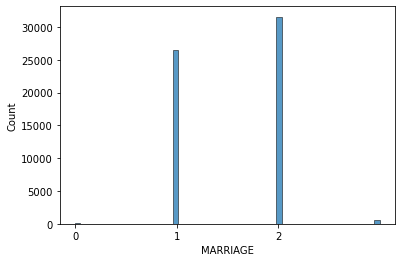

In [79]:
sns.histplot(
    data=df, 
    x="MARRIAGE",
).set_xticks(range(0,3))

In [80]:
df["MARRIAGE"].value_counts().sort_index()

0.0      114
1.0    26519
2.0    31546
3.0      617
Name: MARRIAGE, dtype: int64

## Age
AGE: Alter in Jahren

<AxesSubplot:xlabel='AGE', ylabel='Count'>

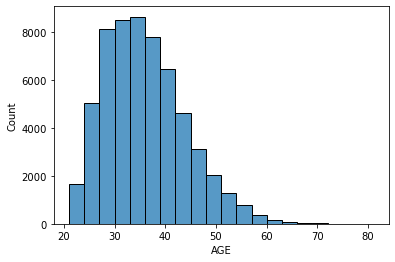

In [18]:
sns.histplot(
    data=df, 
    x="AGE",
    binwidth=3
)

<AxesSubplot:>

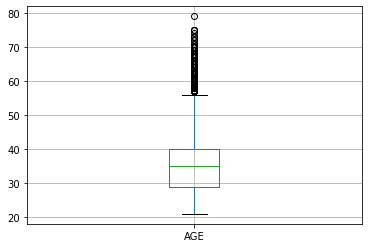

In [19]:
df.boxplot(
    column="AGE"
)

## default.payment.next.month
default.payment.next.month: Zahlungsausfall im Folgemonat (1 = Zahlungsausfall, 0 = kein Zahlungsausfall)

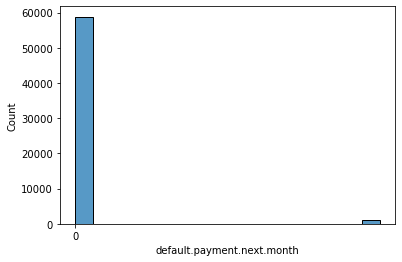

In [82]:
sns.histplot(
    data=df, 
    x=target,
).set_xticks(range(0,1))

In [83]:
df[target].value_counts().sort_index()

0    58806
1     1193
Name: default.payment.next.month, dtype: int64

# Zusammenhänge

## Limit Bal

In [22]:
col = "limit_group_1"
df[col] = pd.cut(df.LIMIT_BAL, 10)
total = df.groupby([col]).count()[target]
ausfall = df[df[target] == 1].groupby([col]).count()[target]

print(total, ausfall,  ( ausfall / total ) * 100)

limit_group_1
(9010.0, 109000.0]       19468
(109000.0, 208000.0]     19805
(208000.0, 307000.0]     12270
(307000.0, 406000.0]      5047
(406000.0, 505000.0]      1998
(505000.0, 604000.0]       155
(604000.0, 703000.0]        61
(703000.0, 802000.0]        22
(802000.0, 901000.0]         0
(901000.0, 1000000.0]        1
Name: default.payment.next.month, dtype: int64 limit_group_1
(9010.0, 109000.0]       914
(109000.0, 208000.0]     154
(208000.0, 307000.0]      67
(307000.0, 406000.0]      24
(406000.0, 505000.0]       7
(505000.0, 604000.0]       2
(604000.0, 703000.0]       0
(703000.0, 802000.0]       0
(802000.0, 901000.0]       0
(901000.0, 1000000.0]      0
Name: default.payment.next.month, dtype: int64 limit_group_1
(9010.0, 109000.0]       4.694884
(109000.0, 208000.0]     0.777581
(208000.0, 307000.0]     0.546047
(307000.0, 406000.0]     0.475530
(406000.0, 505000.0]     0.350350
(505000.0, 604000.0]     1.290323
(604000.0, 703000.0]     0.000000
(703000.0, 802000.0]     0

## Sex

In [23]:
col = "SEX"
total = df.groupby([col]).count()[target]
ausfall = df[df[target] == 1].groupby([col]).count()[target]

print(total, ausfall,  ( ausfall / total ) * 100)

SEX
1.0    22898
2.0    35864
Name: default.payment.next.month, dtype: int64 SEX
1.0    589
2.0    584
Name: default.payment.next.month, dtype: int64 SEX
1.0    2.572277
2.0    1.628374
Name: default.payment.next.month, dtype: float64


## Education

In [24]:
col = "EDUCATION"
total = df.groupby([col]).count()[target]
ausfall = df[df[target] == 1].groupby([col]).count()[target]

print(total, ausfall,  ( ausfall / total ) * 100)

EDUCATION
0.0       13
1.0    14481
2.0    33001
3.0    10246
4.0      694
5.0      297
6.0       54
Name: default.payment.next.month, dtype: int64 EDUCATION
1.0    245
2.0    658
3.0    261
5.0      3
Name: default.payment.next.month, dtype: int64 EDUCATION
0.0         NaN
1.0    1.691872
2.0    1.993879
3.0    2.547336
4.0         NaN
5.0    1.010101
6.0         NaN
Name: default.payment.next.month, dtype: float64


## MARRIAGE

In [25]:
col = "MARRIAGE"
total = df.groupby([col]).count()[target]
ausfall = df[df[target] == 1].groupby([col]).count()[target]

print(total, ausfall,  ( ausfall / total ) * 100)

MARRIAGE
0.0      114
1.0    26519
2.0    31546
3.0      617
Name: default.payment.next.month, dtype: int64 MARRIAGE
0.0      2
1.0    512
2.0    633
3.0     18
Name: default.payment.next.month, dtype: int64 MARRIAGE
0.0    1.754386
1.0    1.930691
2.0    2.006594
3.0    2.917342
Name: default.payment.next.month, dtype: float64


## Age

In [26]:
col = "age_group_1"
df[col] = pd.cut(df.AGE, 10)
total = df.groupby([col]).count()[target]
ausfall = df[df[target] == 1].groupby([col]).count()[target]

print(total, ausfall,  ( ausfall / total ) * 100)

age_group_1
(20.942, 26.8]     6702
(26.8, 32.6]      16637
(32.6, 38.4]      16417
(38.4, 44.2]      11089
(44.2, 50.0]       5159
(50.0, 55.8]       1850
(55.8, 61.6]        716
(61.6, 67.4]        167
(67.4, 73.2]         39
(73.2, 79.0]          5
Name: default.payment.next.month, dtype: int64 age_group_1
(20.942, 26.8]    310
(26.8, 32.6]      274
(32.6, 38.4]      173
(38.4, 44.2]      182
(44.2, 50.0]      111
(50.0, 55.8]       71
(55.8, 61.6]       42
(61.6, 67.4]        7
(67.4, 73.2]        0
(73.2, 79.0]        0
Name: default.payment.next.month, dtype: int64 age_group_1
(20.942, 26.8]    4.625485
(26.8, 32.6]      1.646932
(32.6, 38.4]      1.053786
(38.4, 44.2]      1.641266
(44.2, 50.0]      2.151580
(50.0, 55.8]      3.837838
(55.8, 61.6]      5.865922
(61.6, 67.4]      4.191617
(67.4, 73.2]      0.000000
(73.2, 79.0]      0.000000
Name: default.payment.next.month, dtype: float64


## Limit + Age

In [27]:
age_split = 6
limit_split = 8

In [28]:
df["age_group"] = pd.cut(df.AGE, age_split)
df["age_group"] = df["age_group"].astype('category')
df["limit_group"] = pd.cut(df.LIMIT_BAL, limit_split)
df["limit_group"] = df["limit_group"].astype('category')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month,limit_group_1,age_group_1,age_group,limit_group
0,200000.0,1.0,2.0,2.0,25.0,0,"(109000.0, 208000.0]","(20.942, 26.8]","(20.942, 30.667]","(133750.0, 257500.0]"
1,20000.0,NaN,1.0,2.0,25.0,0,"(9010.0, 109000.0]","(20.942, 26.8]","(20.942, 30.667]","(9010.0, 133750.0]"
2,60000.0,2.0,2.0,1.0,44.0,0,"(9010.0, 109000.0]","(38.4, 44.2]","(40.333, 50.0]","(9010.0, 133750.0]"
3,95000.0,1.0,2.0,2.0,41.0,0,"(9010.0, 109000.0]","(38.4, 44.2]","(40.333, 50.0]","(9010.0, 133750.0]"
4,95000.0,2.0,2.0,2.0,31.0,0,"(9010.0, 109000.0]","(26.8, 32.6]","(30.667, 40.333]","(9010.0, 133750.0]"
...,...,...,...,...,...,...,...,...,...,...
59994,500000.0,2.0,3.0,2.0,44.0,0,"(406000.0, 505000.0]","(38.4, 44.2]","(40.333, 50.0]","(381250.0, 505000.0]"
59995,80000.0,1.0,3.0,1.0,41.0,0,"(9010.0, 109000.0]","(38.4, 44.2]","(40.333, 50.0]","(9010.0, 133750.0]"
59996,80000.0,2.0,2.0,1.0,NaN,0,"(9010.0, 109000.0]",NaN,NaN,"(9010.0, 133750.0]"
59997,500000.0,2.0,1.0,2.0,27.0,0,"(406000.0, 505000.0]","(26.8, 32.6]","(20.942, 30.667]","(381250.0, 505000.0]"


In [29]:
age_limit_group_total = df.groupby(["age_group", "limit_group"]).count()[target]
age_limit_group_total

age_group         limit_group          
(20.942, 30.667]  (9010.0, 133750.0]        9673
                  (133750.0, 257500.0]      5496
                  (257500.0, 381250.0]      1748
                  (381250.0, 505000.0]       430
                  (505000.0, 628750.0]        15
                  (628750.0, 752500.0]         8
                  (752500.0, 876250.0]         0
                  (876250.0, 1000000.0]        0
(30.667, 40.333]  (9010.0, 133750.0]        8835
                  (133750.0, 257500.0]     10716
                  (257500.0, 381250.0]      5003
                  (381250.0, 505000.0]      1369
                  (505000.0, 628750.0]       102
                  (628750.0, 752500.0]        25
                  (752500.0, 876250.0]         0
                  (876250.0, 1000000.0]        0
(40.333, 50.0]    (9010.0, 133750.0]        4460
                  (133750.0, 257500.0]      4161
                  (257500.0, 381250.0]      2098
                  (381250.0, 

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_39225/2627232399.py:3: RuntimeWarning: invalid value encountered in true_divide
  data = (x / y) * 100


<AxesSubplot:>

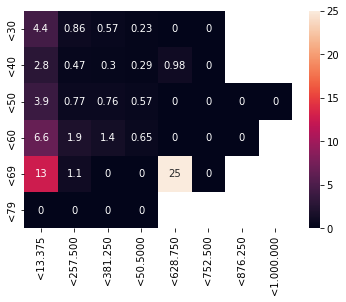

In [30]:
x = df[df["default.payment.next.month"] == 1].groupby(["age_group", "limit_group"]).count()[target].to_numpy().reshape(6,8)
y = age_limit_group_total.to_numpy().reshape(6,8)
data = (x / y) * 100
sns.heatmap(
    data=data,
    annot=True,
    xticklabels=["<13.375", "<257.500", "<381.250", "<50.5000", "<628.750", "<752.500", "<876.250", "<1.000.000"],
    yticklabels=["<30", "<40", "<50", "<60", "<69", "<79"]
)

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_39225/2763569395.py:3: RuntimeWarning: invalid value encountered in true_divide
  data = (x / y) * 100


<AxesSubplot:>

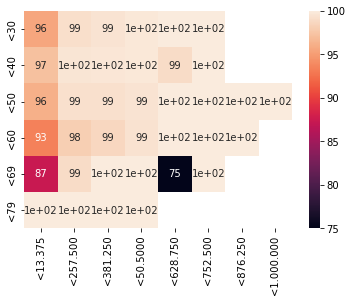

In [31]:
x = df[df["default.payment.next.month"] == 0].groupby(["age_group", "limit_group"]).count()[target].to_numpy().reshape(6,8)
y = age_limit_group_total.to_numpy().reshape(6,8)
data = (x / y) * 100
sns.heatmap(
    data=data,
    annot=True,
    xticklabels=["<13.375", "<257.500", "<381.250", "<50.5000", "<628.750", "<752.500", "<876.250", "<1.000.000"],
    yticklabels=["<30", "<40", "<50", "<60", "<69", "<79"]
)

## Zusammenfassung

### Arten der Daten
Limit Bal: Numerisch
Sex: Kategorisch
Education: Kategorisch
Marruage: Kategorisch
Age: Nummerisch
Zahlung: Kategorisch

### 

# Modeling

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
df = pd.read_csv("Daten/Kreditausfaelle/default.csv", delimiter=";")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
0,200000.0,1.0,2.0,2.0,25.0,0
1,20000.0,NaN,1.0,2.0,25.0,0
2,60000.0,2.0,2.0,1.0,44.0,0
3,95000.0,1.0,2.0,2.0,41.0,0
4,95000.0,2.0,2.0,2.0,31.0,0
...,...,...,...,...,...,...
59994,500000.0,2.0,3.0,2.0,44.0,0
59995,80000.0,1.0,3.0,1.0,41.0,0
59996,80000.0,2.0,2.0,1.0,NaN,0
59997,500000.0,2.0,1.0,2.0,27.0,0


In [34]:
print(len(df))
df = df.dropna()

print(len(df))

59999
54190


In [35]:
def run(df, rf_max_features=[1,3,5]):
    #split
    df_pos = df[df[target] == 1]
    print('ausfealle', df_pos[target].unique(), len(df_pos))
    y_train_pos = df_pos[target]
    x_train_pos = df_pos.drop(labels=target, axis=1)

    X_train_pos, X_test_pos, Y_train_pos, Y_test_pos  = train_test_split(x_train_pos, y_train_pos, test_size=0.25, random_state=42)
    print('x pos train', len(X_train_pos))
    print('y pos train', len(Y_train_pos))
    print('x pos test ', len(X_test_pos))
    print('y pos test ', len(Y_test_pos))
    
    
    n = 1250
    df_neg = df[df[target] == 0]
    df_neg = df_neg.sample(n)
    print('zahlungen', df_neg[target].unique(), len(df_neg))
    y_train_neg = df_neg[target]
    x_train_neg = df_neg.drop(labels=target, axis=1)

    X_train_neg, X_test_neg, Y_train_neg, Y_test_neg  = train_test_split(x_train_neg, y_train_neg, test_size=0.25, random_state=42)
    print('x neg train', len(X_train_neg))
    print('y neg train', len(Y_train_neg))
    print('x neg test ', len(X_test_neg))
    print('y neg test ', len(Y_test_neg))
    
    # combine 
    X_train = pd.concat([X_train_pos, X_train_neg])
    y_train = pd.concat([Y_train_pos, Y_train_neg])

    X_test = pd.concat([X_test_pos, X_test_neg])
    y_test = pd.concat([Y_test_pos, Y_test_neg])


    print(f"{len(X_train)}, {len(y_train)}, {len(X_test)}, {len(y_test)}")
    
    # Classifiyer
    random = 42
    classifier= [
        DecisionTreeClassifier(random_state=random),
        SVC(random_state=random),
        RandomForestClassifier(random_state=random),
        LogisticRegression(random_state=random),
        KNeighborsClassifier()
    ]
    
    dt_param_grid = { 
    "min_samples_split" : range(10,500,50),
    "max_depth": range(1,6,2) 
    }

    svc_param_grid = {
        "kernel" : ["rbf"], 
        "gamma": [0.001, 0.01, 0.1], 
        "C": [1,5,10] 
    } 

    rf_param_grid = { 
        "max_features": rf_max_features, 
        "min_samples_split":[3,10], 
        "min_samples_leaf":[3,10], 
        "bootstrap":[False], 
        "n_estimators":[100,300], 
        "criterion":["gini"] 
    } 

    logreg_param_grid = { 
        "C": np.logspace(-3,3,7), 
        "penalty": ["l2"] 
    } 

    knn_param_grid = { 
        "n_neighbors": np.linspace(1,19,10, dtype = int).tolist(), 
        "weights": ["uniform","distance"],
        "metric":["euclidean","manhattan"]
    }

    classifier_param = [ 
        dt_param_grid, 
        svc_param_grid, 
        rf_param_grid, 
        logreg_param_grid, 
        knn_param_grid 
    ]
    
    # Train
    cv_result = [] 
    best_estimators = [] 
    for i in range(len(classifier)): 
        clf = GridSearchCV( 
            classifier[i], 
            param_grid=classifier_param[i], 
            cv = StratifiedKFold(n_splits = 10), 
            scoring = "accuracy",
            n_jobs = -1, 
            verbose = 1
        )
        
        clf.fit(X_train,y_train) 
        cv_result.append(clf.best_score_) 
        best_estimators.append(clf.best_estimator_) 
        print(cv_result[i])
     
    # validate   
    cv_results = pd.DataFrame(
        { 
            'Cross Validation Means': cv_result, 
            'ML Models':[
                'DecisionTreeClassifier', 
                'SVC','RandomForestClassifier', 
                'LogisticRegression',
                'KNeighborsClassifier' 
            ]
        }
    )

    g = sns.barplot('Cross Validation Means', 'ML Models', data = cv_results) 
    g.set_xlabel('Mean Accuracy') 
    g.set_title('Cross Validation Scores')
    plt.show()
    
    votingC = VotingClassifier(
        estimators = [
            ('dt', best_estimators[0]), 
            ('rfc', best_estimators[2]), 
            ('lr', best_estimators[3])
        ], 
        voting = 'soft', n_jobs = -1
    ) 

    votingC = votingC.fit(X_train, y_train) 
    print(accuracy_score(votingC.predict(X_test), y_test))
    return votingC, X_train, X_test, y_train, y_test

ausfealle [1] 1079
x pos train 809
y pos train 809
x pos test  270
y pos test  270
zahlungen [0] 1250
x neg train 937
y neg train 937
x neg test  313
y neg test  313
1746, 1746, 583, 583
Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.7462561576354679
Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.7519671592775042
Fitting 10 folds for each of 24 candidates, totalling 240 fits
0.7468308702791461
Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.7285057471264368
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.749103448275862


/opt/homebrew/Caskroom/miniconda/base/envs/journey2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


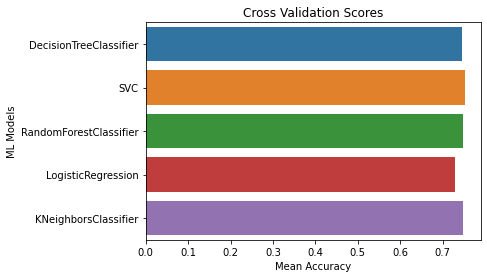

0.7444253859348199
train: 
 [[740 197]
 [215 594]]
test 
 [[238  75]
 [ 74 196]]


In [36]:
votingC_1, X_train, X_test, y_train, y_test = run(df, rf_max_features=[1,3,5])
pred = votingC_1.predict(X_train)

pred = votingC_1.predict(X_train)
print('train: \n', confusion_matrix(y_train, pred))

pred = votingC_1.predict(X_test)
print('test \n', confusion_matrix(y_test, pred))

ausfealle [1] 1079
x pos train 809
y pos train 809
x pos test  270
y pos test  270


/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_39225/1874127883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["SEX", "EDUCATION", "MARRIAGE"], axis=1, inplace=True)


zahlungen [0] 1250
x neg train 937
y neg train 937
x neg test  313
y neg test  313
1746, 1746, 583, 583
Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.7296814449917898
Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.753152709359606
Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.7393793103448275
Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.7193563218390804
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7445714285714286


/opt/homebrew/Caskroom/miniconda/base/envs/journey2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


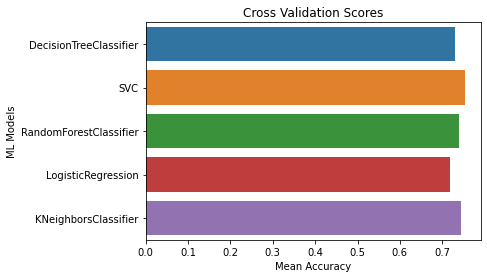

0.7409948542024014
train: 
 [[746 191]
 [219 590]]
test 
 [[240  73]
 [ 78 192]]


In [37]:
df.drop(["SEX", "EDUCATION", "MARRIAGE"], axis=1, inplace=True)
votingC_2, X_train, X_test, y_train, y_test = run(df, rf_max_features=[1,2])

pred = votingC_2.predict(X_train)
print('train: \n', confusion_matrix(y_train, pred))

pred = votingC_2.predict(X_test)
print('test \n', confusion_matrix(y_test, pred))

In [38]:
# Heatmap
x = np.array(range(21, 79, 1))
y = np.array(range(10_000, 1_000_000, 5_000))

data = []
for age in y:
    for limit in x:
        data.append([age, limit])
        
df_heatmap = pd.DataFrame(data, columns=["LIMIT_BAL", "AGE"])
df_heatmap

,LIMIT_BAL,AGE
0,10000,21
1,10000,22
2,10000,23
3,10000,24
4,10000,25
...,...,...
11479,995000,74
11480,995000,75
11481,995000,76
11482,995000,77


In [39]:
pred = votingC_2.predict(df_heatmap)
df_heatmap["pred"] = pred
df_heatmap

,LIMIT_BAL,AGE,pred
0,10000,21,1
1,10000,22,1
2,10000,23,1
3,10000,24,1
4,10000,25,1
...,...,...,...
11479,995000,74,0
11480,995000,75,0
11481,995000,76,0
11482,995000,77,0


<AxesSubplot:>

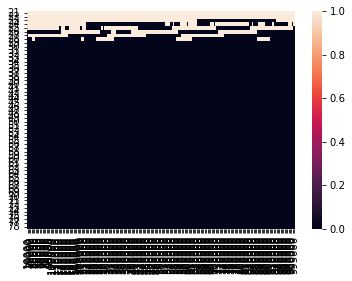

In [40]:
pred_conf = pred.reshape((len(x), len(y)))
sns.heatmap(
    data=pred_conf,
    yticklabels=x,
    xticklabels=y
)

In [41]:
df_heatmap["age_group"] = pd.cut(df_heatmap.AGE, age_split)
df_heatmap["age_group"] = df_heatmap["age_group"].astype('category')
df_heatmap["limit_group"] = pd.cut(df_heatmap.LIMIT_BAL, limit_split)
df_heatmap["limit_group"] = df_heatmap["limit_group"].astype('category')


In [42]:
pred_conf = df_heatmap.groupby(["age_group", "limit_group"]).mean()["pred"].to_numpy().reshape(age_split, limit_split)

<AxesSubplot:>

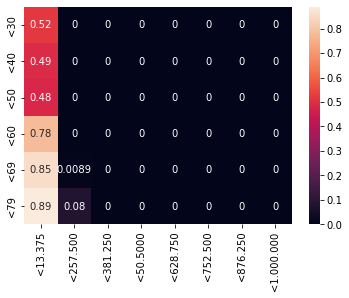

In [43]:
sns.heatmap(
    data=pred_conf,
    annot=True,
    xticklabels=["<13.375", "<257.500", "<381.250", "<50.5000", "<628.750", "<752.500", "<876.250", "<1.000.000"],
    yticklabels=["<30", "<40", "<50", "<60", "<69", "<79"]
)